<a href="https://colab.research.google.com/github/UmarKhattab09/Customer-Churn-Prediction/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv("customer_churn_dataset-training-master.csv")
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


### Feature Engineering.
- All of these are in the Different .ipynb
- Trying ANN


In [5]:
df[df['Age'].isna()] # ---> One Column doesn't have any value. We can drop it
df.dropna(inplace=True)

In [6]:
df['Age'].unique()
bins = [0, 18, 30, 50, 100]
labels = ['Under 18', '18-29', '30-49', '50+']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [7]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df[['Gender']])
df['GenderModified'] = labelencoder.fit_transform(df[['Gender']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:

import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
df['SubscriptionTypeModified'] = encoder.fit_transform(df[['Subscription Type']])
df[['Subscription Type','SubscriptionTypeModified']].head()

,Subscription Type,SubscriptionTypeModified
0,Standard,1.0
1,Basic,0.0
2,Basic,0.0
3,Standard,1.0
4,Basic,0.0


In [9]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])
df['ContractLengthModified'] = encoder.fit_transform(df[['Contract Length']])
df[['Contract Length','ContractLengthModified']].head()


,Contract Length,ContractLengthModified
0,Annual,2.0
1,Monthly,0.0
2,Quarterly,1.0
3,Monthly,0.0
4,Monthly,0.0


In [10]:
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,AgeGroups,GenderModified,SubscriptionTypeModified,ContractLengthModified
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0,30-49,0,1.0,2.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0,50+,0,0.0,0.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0,50+,0,0.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0,50+,1,1.0,0.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0,18-29,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0,30-49,1,2.0,2.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0,18-29,0,2.0,2.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0,18-29,1,1.0,1.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0,18-29,1,1.0,1.0


In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
Trainingdf = df.drop(['Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
X,y=smote.fit_resample(Trainingdf.drop(['Churn'],axis=1),Trainingdf['Churn'])
X

,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,GenderModified,SubscriptionTypeModified,ContractLengthModified
0,30.000000,39.000000,14.000000,5.000000,18.000000,932.000000,17.000000,0,1.000000,2.000000
1,65.000000,49.000000,1.000000,10.000000,8.000000,557.000000,6.000000,0,0.000000,0.000000
2,55.000000,14.000000,4.000000,6.000000,18.000000,185.000000,3.000000,0,0.000000,1.000000
3,58.000000,38.000000,21.000000,7.000000,7.000000,396.000000,29.000000,1,1.000000,0.000000
4,23.000000,32.000000,20.000000,5.000000,8.000000,617.000000,20.000000,1,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
499993,34.817477,8.727508,17.910030,1.727508,13.182523,909.748041,30.000000,1,1.727508,1.727508
499994,33.101144,4.575858,27.525286,0.000000,2.373570,560.815530,8.474714,0,1.000000,2.000000
499995,41.269187,38.730813,28.365406,2.634594,17.903781,930.232715,11.634594,0,1.365406,1.365406
499996,40.000000,9.000000,25.780259,2.000000,20.000000,944.170317,9.780259,0,1.219741,1.219741


In [12]:
X= df.drop(['Churn','Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
y= df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
#Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [20]:
### let intialize the ANN
classifier = Sequential()


###----> Adding Input Layer
classifier.add(Dense(units=10,activation='relu'))


###---> Adding the Frist Hidden Layer
classifier.add(Dense(units=7,activation='relu'))


###---> Adding the Second Hidden Layer
classifier.add(Dense(units=6,activation='relu'))


###---> Adding the Output Layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
X_train.shape

(396748, 10)

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [42]:
#EARLY STOPPING
import tensorflow as tf
earlystoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.01,
    patience=5,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [44]:
model_history=classifier.fit(X_train,y_train,epochs=25,validation_split=0.2,callbacks=[earlystoping])

Epoch 1/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.9736 - loss: 0.0854 - val_accuracy: 0.9728 - val_loss: 0.0861
Epoch 2/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.9725 - loss: 0.0882 - val_accuracy: 0.9784 - val_loss: 0.0730
Epoch 3/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9726 - loss: 0.0871 - val_accuracy: 0.9707 - val_loss: 0.0928
Epoch 4/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - accuracy: 0.9749 - loss: 0.0815 - val_accuracy: 0.9783 - val_loss: 0.0728
Epoch 5/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.9747 - loss: 0.0821 - val_accuracy: 0.9747 - val_loss: 0.0778
Epoch 6/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 37s 3ms/step - accuracy: 0.9744 - loss: 0.0821 - val_accuracy: 0.9789 - val_loss: 0.0906
Epoch 7/25
9919/9919 ━━━━━━━━━━━━━━━━━━━━ 33s 3ms/step - accuracy: 0.9757 - loss: 0.0792 - val_accuracy: 0.9751 - val_loss: 0.0779
Epoch 7: early stopping


In [45]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

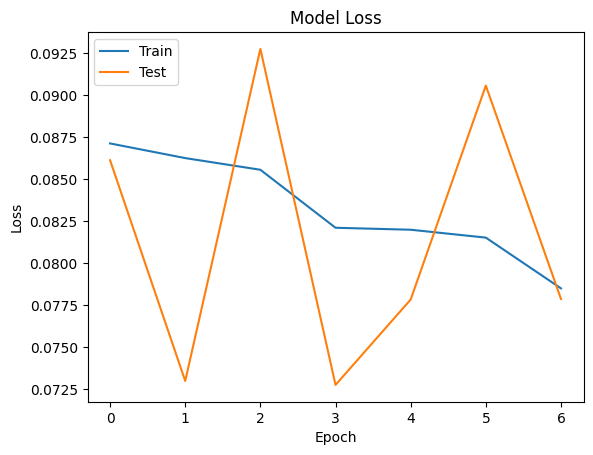

In [48]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

Text(0.5, 0, 'Epoch')

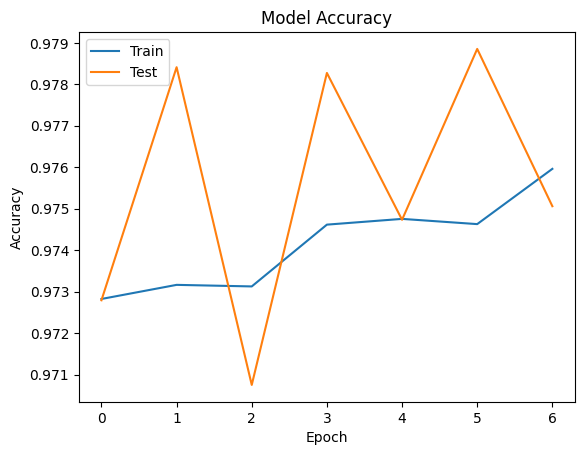

In [49]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')

plt.xlabel('Epoch')

In [50]:
### TEST DATASET
df = pd.read_csv("customer_churn_dataset-testing-master.csv")
df['Age'].unique()
bins = [0, 18, 30, 50, 100]
labels = ['Under 18', '18-29', '30-49', '50+']
df['AgeGroups'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit_transform(df[['Gender']])
df['GenderModified'] = labelencoder.fit_transform(df[['Gender']])
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Basic','Standard','Premium']])
df['SubscriptionTypeModified'] = encoder.fit_transform(df[['Subscription Type']])
df[['Subscription Type','SubscriptionTypeModified']].head()
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Monthly','Quarterly','Annual']])
df['ContractLengthModified'] = encoder.fit_transform(df[['Contract Length']])
df[['Contract Length','ContractLengthModified']].head()



X_test= df.drop(['Churn','Subscription Type','Contract Length','Gender','CustomerID','AgeGroups'],axis=1)
y_test= df['Churn']

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
###PART 3 -MAKING PREDICTION
#predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)


2012/2012 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [52]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 3663, 30218],
       [  144, 30349]])

In [53]:
##Calculate THE ACCURACY
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.5283499549507565